<a href="https://colab.research.google.com/github/Vagarh/Job-Satisfaction-Prediction-with-ML/blob/main/EDA_exploracion_y_limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Exploratorio de Datos (EDA)




El analisis exploratorio de datos es el procesos sistematico para analizar e invesigar un conjunto de datos, su relevancia radica que en la expresion "garbage in, Garbage out el cual es un conpceto que se relaciona con la calidad d ela informacion que ingresa al sistema,esto toma mayor  importancia cuando la informacion sera destinada a la implementacion y puesta en produccion de modelo de inteligencia artificial. en el siguiente ejercicio data una base de datos.

Se realiza el analisis, depuracion y transformacion, el resultado esperado en un csv con datos normalizados y listos para ser usado como insumo para la construccion de modelos de inteligencia artificial:


Voy a dividir el análisis en los siguientes apartados:

1.   Analisis Exploratorio 
2.   Eliminacion de atributos Inecesarios
3.   Manejo de Variables Categoricas
4.   Nomalizacion de los datos

In [1]:
# Importo las librerías básicas:

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy import stats
import seaborn as sns

In [2]:
# Asigno los datos a un dataframe:

data_raw=pd.read_excel("/content/info_satisfaccion_trabajo (1).xlsx")


In [3]:
## La funcion Shape nos permite conocer las dimensiones del dataframe en este caso son 1470 filas y 35 columnas

data_raw.shape

(1470, 35)

In [4]:
## la funcion dtype nos permite conocer el tipo de datos presente en el data set
##se hallan 9 varaibles tipo objeto ,un tipo de dato inadecuado para el ML segun el analisis del negocio se procedera a eliminar o ajustar 
data_raw.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# se inspecciona y no se encuentra datos faltantes por lo que no se requerira manejo de  este tipo de datos
data_raw.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Analisis del Problema :JobSatisfaction

Para entender realmente el conjunto de datos, voy a estudiar el significado y la relevancia de cada variable con respecto al problema. Intentaré responder a diversas cuestiones sobre ellas, como:

La variable 'JobSatisfacotion' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable, por lo que voy a estudiarla con mayor detenimiento:

*   La relevancia de las variable en la Satisfaccion laboral
*   La importancia de la variable.
*   Solapamiento con otras variable


In [6]:
# se describe la fucion en cuanto a sus metricas estadisticas
data_raw["JobSatisfaction"].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

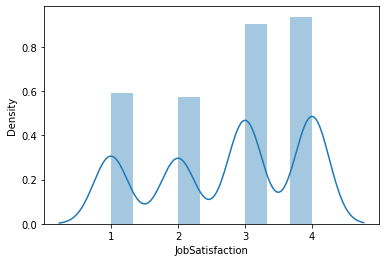

In [7]:
from pickleshare import stat
sns.distplot(data_raw["JobSatisfaction"],kde=True)

A simple vista se pueden apreciar:

No esta normalizado ni escalado , lo anterio plantea que primero debemos escalar la variable y todo el cojunto de data y tambien depurar segun el analisis de las variables que no sean relevantes 

In [8]:
## En el dataset se encuentrna varias columnas con valores binarios que pueden ser transfamos ya sea como los casos de genero(M/F) Attrition y OverTime(Y/N) y Perfomacertin(3/4)  se usa la funcion get_dumiess para asingar un valor 0 y 1 se eliminar estas columnas origianes y se genera un nuevo data frame con los transomadas
data_cl=pd.get_dummies(data_raw, columns=["Gender","Attrition","OverTime"],drop_first=True)

In [9]:
## nuevo data frame con 6 vairables tipo objeto
data_cl.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

# Eliminacion de atributos Inecesarios 

Al inspeccionar el data sett se encuentra que los atributos over18 y Employeecount son constantes y no aportan perturbacion al sistema por ello y con el fin de reducir el costo computacional se procede a eliminarlos y crear un nuevo objeto sin estas.

In [10]:

## se eliminan las Columnas " Over18 y "Employeecount" ya que tiene un valor constante un unico resultado y no aportan informacion al futuro modelo 
data_cl2=data_cl.drop(columns = ["Over18","EmployeeCount"])

In [11]:
data_cl2.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

# Manejo de Variables Categoricas
Luego de las manipulaciones iniciales se observa la persistencia de variables tipo objeto que si bien puede aportar informacion a la situacion no son de facil interpretacion para la maquina


*   BusinessTravel
*   Department 
*   EducationField
*   JobRole 
*   MaritalStatus

Para el manejo de estas variables se realizara una asingacion numerica basado en el numero de elementos presentes en la lista mendiante la funcion "remplace"








In [12]:
data_cl2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,94,...,8,0,1,6,4,0,5,0,1,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,61,...,10,3,3,10,7,1,7,1,0,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,92,...,7,3,3,0,0,0,0,1,1,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,56,...,8,3,3,8,7,3,0,0,0,1
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,40,...,6,3,3,2,2,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,41,...,17,3,3,5,2,0,3,1,0,0
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,42,...,9,5,3,7,7,1,7,1,0,0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,87,...,6,0,3,6,2,0,3,1,0,1
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,63,...,17,3,2,9,6,0,8,1,0,0


In [13]:
data_cl2["BusinessTravel"].replace(["Non-Travel","Travel_Rarely","Travel_Frequently"],[int(1),int(2),int(3)],inplace=True)
data_cl2["Department"].replace(["Human Resources","Research & Development","Sales"],[1,2,3],inplace=True)
data_cl2["EducationField"].replace(["Technical Degree","Other","Medical","Marketing","Life Sciences","Human Resources"],[1,2,3,4,5,6],inplace=True)
data_cl2["JobRole"].replace(["Healthcare Representative","Human Resources","Laboratory Technician","Manager","Manufacturing Director","Research Director","Research Scientist","Sales Executive","Sales Representative"],[1,2,3,4,5,6,7,8,9],inplace=True)
data_cl2["MaritalStatus"].replace(["Divorced","Married","Single"],[1,2,3],inplace=True)



Posterior al cambio de elementos se procede a realizar cambio del tipo de objeto puesto auque tiene una variable numerica sigue con tipo string , esto se logra mendiante la funcion astype.

In [14]:
data_cl2["BusinessTravel"]=data_cl2.BusinessTravel.astype(int)
data_cl2["Department"]=data_cl2.Department.astype(int)
data_cl2["EducationField"]=data_cl2.EducationField.astype(int)
data_cl2["JobRole"]=data_cl2.JobRole.astype(int)
data_cl2["MaritalStatus"]=data_cl2.MaritalStatus.astype(int)

El resultado de la transformacion es un dataframe con una escala solo en numeros , algo mas digerible para la maquina.
No obstante cada atributo posee una escala diferente , con lo cual se requiere aplicar procesos de normalizacion con el fin de miniminzar la redundancia de los datos para su posterior analisis. 

In [15]:
data_cl2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
0,41,2,1102,3,1,2,5,1,2,94,...,8,0,1,6,4,0,5,0,1,1
1,49,3,279,2,8,1,5,2,3,61,...,10,3,3,10,7,1,7,1,0,0
2,37,2,1373,2,2,2,2,4,4,92,...,7,3,3,0,0,0,0,1,1,1
3,33,3,1392,2,3,4,5,5,4,56,...,8,3,3,8,7,3,0,0,0,1
4,27,2,591,2,2,1,3,7,1,40,...,6,3,3,2,2,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,884,2,23,2,3,2061,3,41,...,17,3,3,5,2,0,3,1,0,0
1466,39,2,613,2,6,1,3,2062,4,42,...,9,5,3,7,7,1,7,1,0,0
1467,27,2,155,2,4,3,5,2064,2,87,...,6,0,3,6,2,0,3,1,0,1
1468,49,3,1023,3,2,3,3,2065,4,63,...,17,3,2,9,6,0,8,1,0,0


In [16]:
## Se obtiene un data frame con vairables tipo numerico , ahora se debe normzalizar cada atributo para ateduar la fuerza de cada variable 
data_cl2.dtypes

Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

In [17]:
data_cl2.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.086395,802.485714,2.260544,9.192517,2.912925,3.752381,1024.865306,2.721769,65.891156,...,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.600000,0.161224,0.282993
std,9.135373,0.532170,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,20.329428,...,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.490065,0.367863,0.450606
min,18.000000,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,465.000000,2.000000,2.000000,2.000000,3.000000,491.250000,2.000000,48.000000,...,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,36.000000,2.000000,802.000000,2.000000,7.000000,3.000000,4.000000,1020.500000,3.000000,66.000000,...,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,43.000000,2.000000,1157.000000,3.000000,14.000000,4.000000,5.000000,1555.750000,4.000000,83.750000,...,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.000000,0.000000,1.000000
max,60.000000,3.000000,1499.000000,3.000000,29.000000,5.000000,6.000000,2068.000000,4.000000,100.000000,...,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,1.000000,1.000000


In [18]:
fg=data_cl2.columns

# Normalizacion de los Datos

Para la normalizacion de los datos se usara la funcion"MinMaxScaler" de la libreria Sklearn , es cual transforma los datos a una escala de intervalos por defecto entre 0 y 1

In [19]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()



In [20]:
scalar.fit(data_cl2)
new_data_=scalar.transform(data_cl2)

Considerando que el resultado devuelto por el escalador es un array bidimiensional, a continuación podemos reconstruir el dataframe, añadiendo al array en cuestión la columna "fg" con la variable objetivo y dando nombre a todas las columnas:

In [21]:
sdf=pd.DataFrame(new_data_, columns=fg)
sdf.dtypes

Age                         float64
BusinessTravel              float64
DailyRate                   float64
Department                  float64
DistanceFromHome            float64
Education                   float64
EducationField              float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                     float64
JobSatisfaction             float64
MaritalStatus               float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          

In [26]:
## aqui se pued eobservar el atributo normalizado la celda siguiente expone la misma antes de la normalizacion en el cual se aprecia una mejora en las vairables de dispercion 
sdf["JobSatisfaction"].describe()

count    1470.000000
mean        0.576190
std         0.367615
min         0.000000
25%         0.333333
50%         0.666667
75%         1.000000
max         1.000000
Name: JobSatisfaction, dtype: float64

In [27]:
data_raw["JobSatisfaction"].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Mediente la funcion "describe" observamos las estadisticas de cada uno de los atributos en ellos se puede apreciar varios elementos 



1.   que cada atributo esta escalado , y se encuentra en un mismo rango  en todos los casos el min valor es 0 y el maximo 1
2.   la desviacion estandar es similar en cada atributo  cercana a 
0 esto indica que los datos tienden a estar más cerca a la media
. Entre más lejos estén los datos de la media, más grande es la desviación estándar



In [23]:
sdf.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,Attrition_Yes,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.543197,0.501421,0.630272,0.292590,0.478231,0.550476,0.495339,0.573923,0.512731,...,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537,0.600000,0.161224,0.282993
std,0.217509,0.266085,0.288840,0.263896,0.289531,0.256041,0.266274,0.291255,0.364361,0.290420,...,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890,0.490065,0.367863,0.450606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.500000,0.259843,0.500000,0.035714,0.250000,0.400000,0.237179,0.333333,0.257143,...,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647,0.000000,0.000000,0.000000
50%,0.428571,0.500000,0.501074,0.500000,0.214286,0.500000,0.600000,0.493227,0.666667,0.514286,...,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471,1.000000,0.000000,0.000000
75%,0.595238,0.500000,0.755190,1.000000,0.464286,0.750000,0.800000,0.752177,1.000000,0.767857,...,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


El resultado se guarda en un csv listo para su posterior usuo

In [24]:
sdf.to_excel("JobSatisfactionNormalize.xlsx",index=False)


<div style="text-align: right">Con esto se da por finalizado el proceso de Exploracion y limpieza de los datos  , obteniendo asi un conjunto de datos minimizado en redundancia  y con menor complejidad para su revision el siguiente paso ahora consiste en usar el csv como fuente para la implementacion de un modelo de ML</div>: